In [40]:
import pandas as pd
from glob import glob
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

In [30]:
dfs = [
    pd.read_csv('/Users/rbdurfee/Downloads/2017 Ford F150 Ecoboost/Extended Data Set/61705027 Test Data.txt', sep='\t', header=0)#,
    #pd.read_csv('/Users/rbdurfee/Downloads/2017 Ford F150 Ecoboost/Extended Data Set/61705028 Test Data.txt', sep='\t', header=0),
    #pd.read_csv('/Users/rbdurfee/Downloads/2017 Ford F150 Ecoboost/Extended Data Set/61706053 Test Data.txt', sep='\t', header=0),
    #pd.read_csv('/Users/rbdurfee/Downloads/2017 Ford F150 Ecoboost/Extended Data Set/61706054 Test Data.txt', sep='\t', header=0),
    #pd.read_csv('/Users/rbdurfee/Downloads/2017 Ford F150 Ecoboost/Extended Data Set/61706055 Test Data.txt', sep='\t', header=0)
]

df = pd.concat(dfs, sort=False)
df = df.dropna(axis='index', how='any')

In [55]:
X = df.values

X = StandardScaler().fit_transform(X)

In [58]:
pca = PCA(n_components=1)

principalComponents = pca.fit_transform(X)

<IPython.core.display.Javascript object>


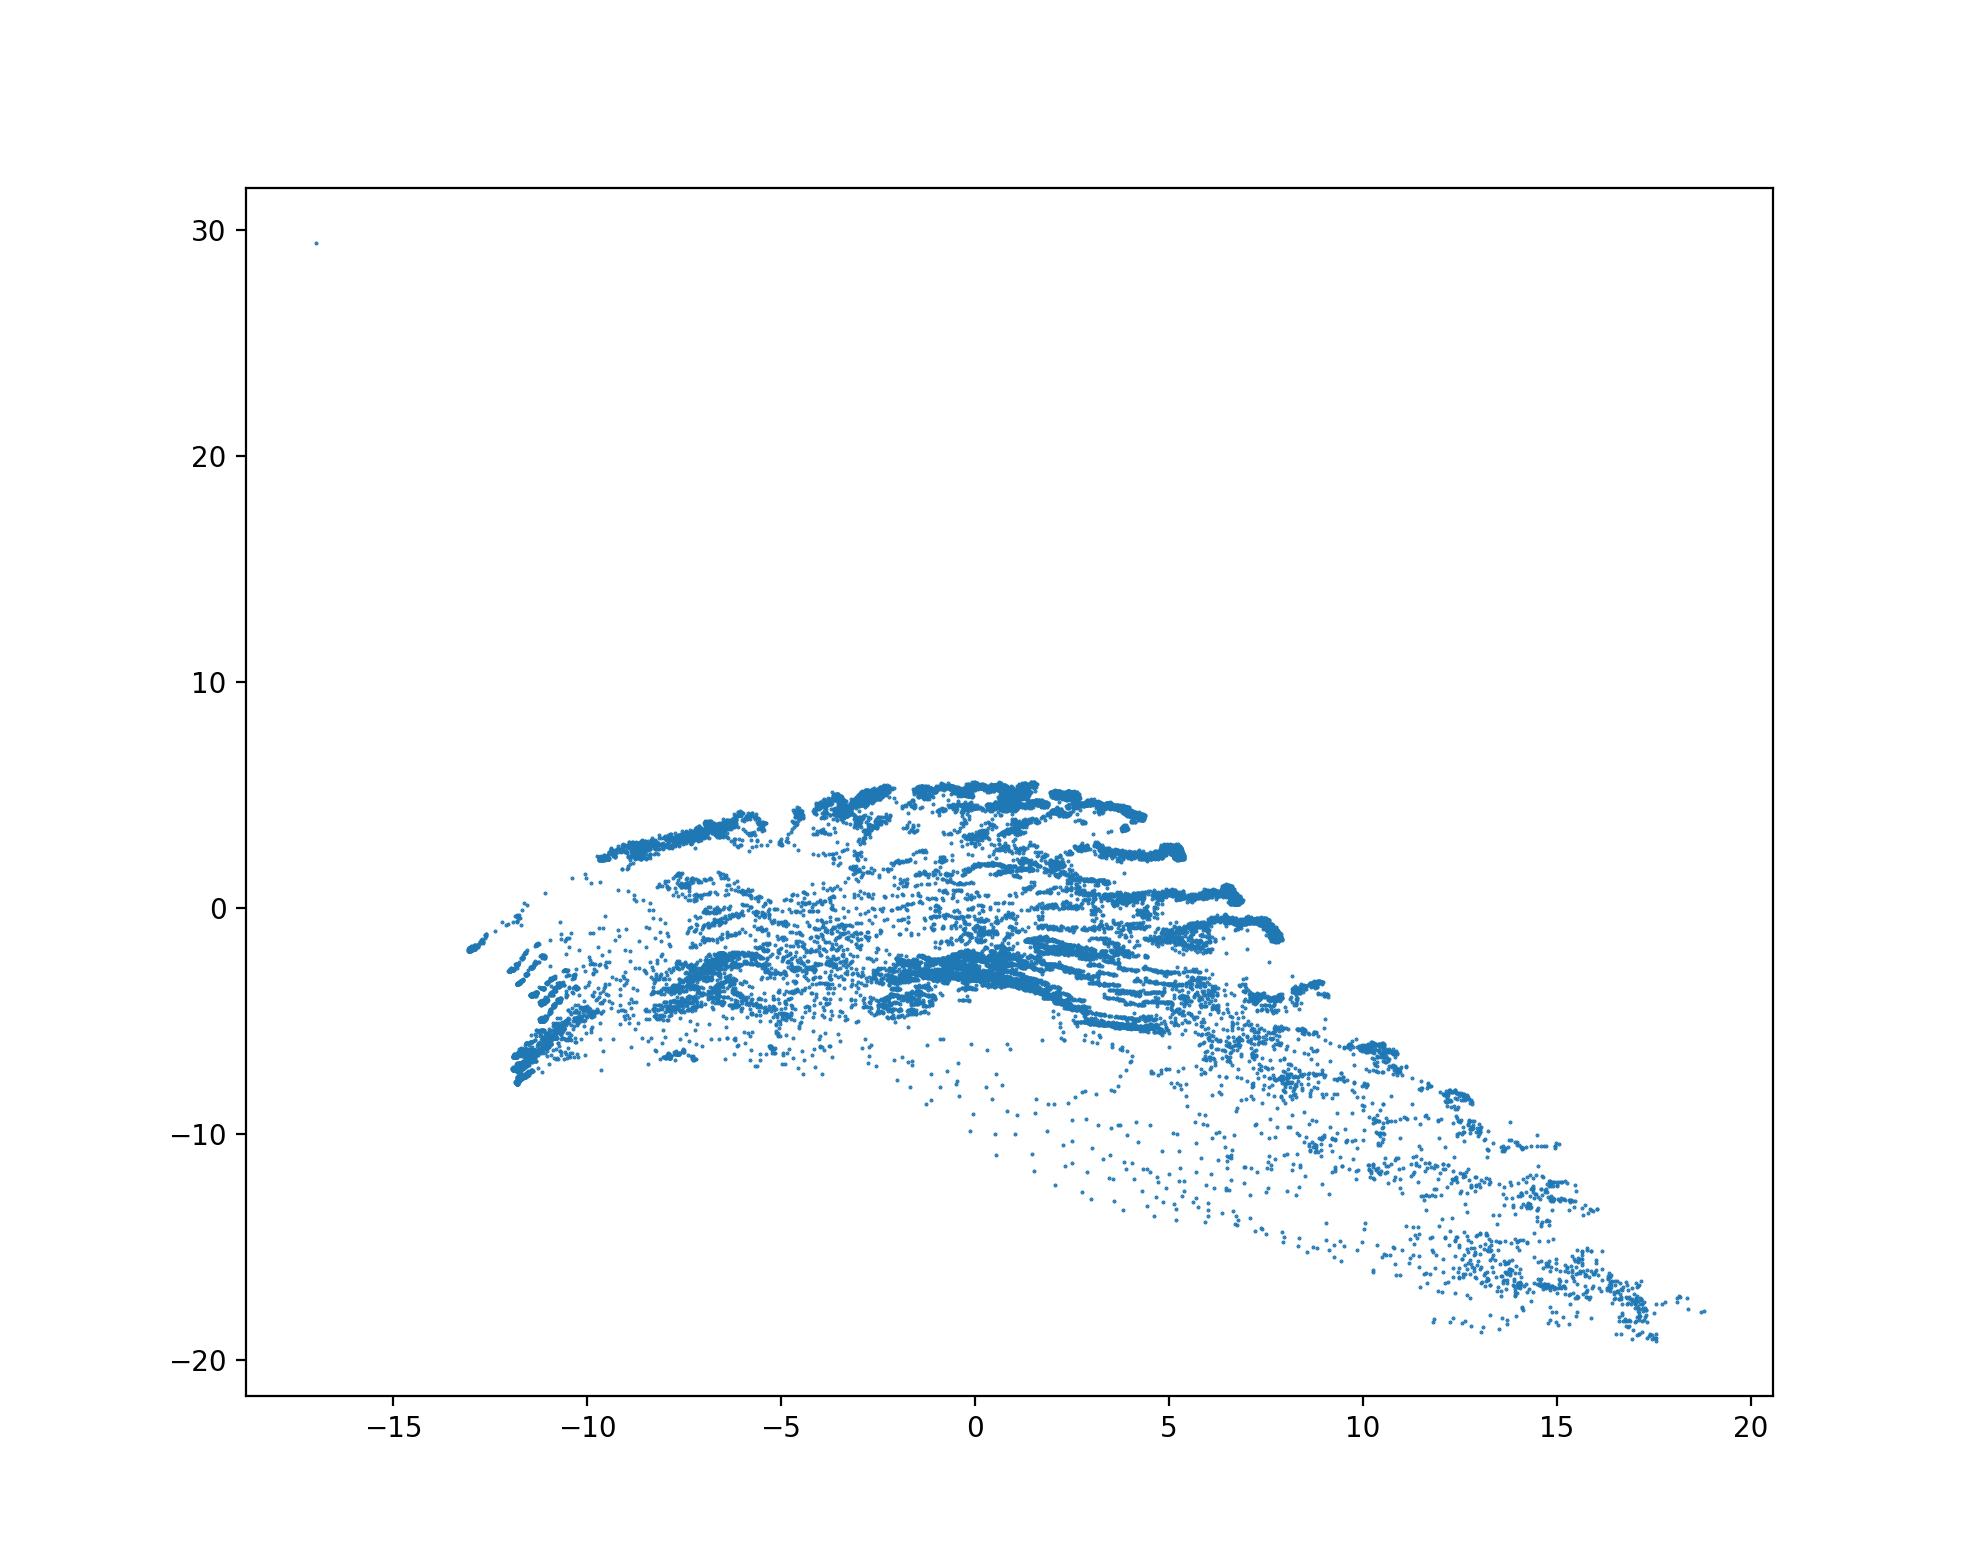

In [34]:
_, ax = plt.subplots()

ax.scatter(principalComponents[:, 0], principalComponents[:, 1], s=0.2)

In [64]:
for i in range(pca.components_.shape[0]):
    
    cols = np.argsort(np.abs(pca.components_[i]))[::-1]
    
    for col in cols[:50]:
        print(pca.components_[i, col], df.columns[col])
    
    print()

0.15043686196120867 Veh_wheel_spd_R2_CAN[]
0.1503866151573335 Trans_output_shaft_speed_raw_TCM[rpm]
0.1503736453222802 Veh_wheel_spd_R1_CAN[]
0.15002226639294353 Veh_speed_high_res_TCM[kph]
0.14945852547616223 Dyno_Spd[mph]
0.14945852547616223 Dyno_Spd_Rear[mph]
0.14690309532770415 Veh_speed_PCM[mph]
0.14671965444740315 Trans_turbine_shaft_speed_raw_TCM[rpm]
0.1432912254714002 Eng_speed_CAN[rpm]
0.14328866730864484 Eng_speed_PCM[rpm]
0.14328474242295153 Engine_speed_TCM[rpm]
0.14278546609817036 Trans_intermediate_shaft_B_speed_raw_TCM[rpm]
0.14223886747810302 Eng_gen_current_max_PCM[A]
0.13839061304644384 Trans_torque_converter_clutch_solenoid_press_TCM[kPa]
-0.13129053413392347 Trans_gear_ratio_measured_TCM[]
0.12898445521165544 Trans_gear_commanded by_output_state_control_TCM[]
0.12570409506357802 Trans_gear_desired_CAN[]
-0.12520649761232014 Trans_torque_converter_slip_desired_TCM[rpm]
0.124935434328999 Trans_gear_engaged_CAN[]
0.1241227672214661 DilAir_RH[%]
0.1228083563952274 Eng_

In [77]:
corr_mat = df.corr().values

In [99]:
most_corr_ind = np.unravel_index(np.argsort(np.abs(corr_mat), axis=None)[::-1], (166, 166))

for i in range(most_corr_ind[0].shape[0]):
    
    if pd.isnull(corr_mat[most_corr_ind[0][i], most_corr_ind[1][i]]):
        continue
    
    if most_corr_ind[0][i] == most_corr_ind[1][i]:
        continue
    
    print(corr_mat[most_corr_ind[0][i], most_corr_ind[1][i]], df.columns[most_corr_ind[0][i]], df.columns[most_corr_ind[1][i]])

1.000000000004705 Veh_barometric_press_PCM[kPa] Eng_learned_relative_octane_adjustment_PCM[per]
1.000000000004705 Eng_learned_relative_octane_adjustment_PCM[per] Veh_barometric_press_PCM[kPa]
1.0000000000040095 Eng_start_stop_monitor_state_TCM[] Veh_barometric_press_PCM[kPa]
1.0000000000040095 Veh_barometric_press_PCM[kPa] Eng_start_stop_main_control_state_TCM[]
1.0000000000040095 Veh_barometric_press_PCM[kPa] Eng_start_stop_monitor_state_TCM[]
1.0000000000040095 Eng_start_stop_main_control_state_TCM[] Veh_barometric_press_PCM[kPa]
1.0000000000039215 Eng_start_stop_monitor_state_TCM[] Eng_learned_relative_octane_adjustment_PCM[per]
1.0000000000039215 Eng_learned_relative_octane_adjustment_PCM[per] Eng_start_stop_monitor_state_TCM[]
1.0000000000039215 Eng_start_stop_main_control_state_TCM[] Eng_learned_relative_octane_adjustment_PCM[per]
1.0000000000039215 Eng_learned_relative_octane_adjustment_PCM[per] Eng_start_stop_main_control_state_TCM[]
1.000000000003796 Veh_barometric_press_PCM[k

-0.8215068302551264 Engine_speed_TCM[rpm] Dyno_LoadCell[N]
-0.8215068302551264 Engine_speed_TCM[rpm] Dyno_LoadCell_Rear[N]
0.8206846118153368 Eng_start_stop_active_CAN[] Fuel_pump_flow_rate_PCM[per]
0.8206846118153368 Fuel_pump_flow_rate_PCM[per] Eng_start_stop_active_CAN[]
-0.8196655172199859 Eng_start_stop_active_CAN[] Eng_start_stop_state_CAN[]
-0.8196655172199859 Eng_start_stop_state_CAN[] Eng_start_stop_active_CAN[]
0.8169526154229062 Trans_gear_commanded by_output_state_control_TCM[] Eng_gen_current_max_PCM[A]
0.8169526154229062 Eng_gen_current_max_PCM[A] Trans_gear_commanded by_output_state_control_TCM[]
0.8161965663241508 Eng_speed_CAN[rpm] Eng_FuelFlow_Direct[ccps]
0.8161965663241508 Eng_FuelFlow_Direct[ccps] Eng_speed_CAN[rpm]
0.8157337800298577 Eng_speed_PCM[rpm] Eng_FuelFlow_Direct[ccps]
0.8157337800298577 Eng_FuelFlow_Direct[ccps] Eng_speed_PCM[rpm]
-0.8155611340076848 Engine_Oil_Dipstick_Temp[C] Cell_Press[inHg]
-0.8155611340076848 Cell_Press[inHg] Engine_Oil_Dipstick_Tem

0.6741391190425334 Eng_speed_CAN[rpm] Veh_wheel_spd_R2_CAN[]
0.6741391190425334 Veh_wheel_spd_R2_CAN[] Eng_speed_CAN[rpm]
0.6740954874379492 Eng_speed_PCM[rpm] Trans_output_shaft_speed_raw_TCM[rpm]
0.6740954874379492 Trans_output_shaft_speed_raw_TCM[rpm] Eng_speed_PCM[rpm]
0.6739004571708591 Veh_wheel_spd_R1_CAN[] Eng_speed_PCM[rpm]
0.6739004571708591 Eng_speed_PCM[rpm] Veh_wheel_spd_R1_CAN[]
0.6738747059695671 Eng_throttle_position_PCM[per] Trans_line_pressure_desired_TCM[kPa]
0.6738747059695671 Trans_line_pressure_desired_TCM[kPa] Eng_throttle_position_PCM[per]
0.6735148604080468 Trans_output_shaft_speed_raw_TCM[rpm] Eng_speed_CAN[rpm]
0.6735148604080468 Eng_speed_CAN[rpm] Trans_output_shaft_speed_raw_TCM[rpm]
-0.6735082448219921 Eng_fuel_rail_press_PCM[kPa] Eng_camshaft_exhaust_position_actual_bank1_PCM[deg]
-0.6735082448219921 Eng_camshaft_exhaust_position_actual_bank1_PCM[deg] Eng_fuel_rail_press_PCM[kPa]
0.6734916121135227 Eng_oil_pressure_PCM[kPa] Eng_measured_boost_at_throttle_

-0.5747130748191606 HVAC_AC_pressure_PCM[kPa] Cell_Temp[C]
0.5740228047427091 Alternator_Power_Hioki_P2[W] Eng_cooling_fan_speed_desired_PCM[per]
0.5740228047427091 Eng_cooling_fan_speed_desired_PCM[per] Alternator_Power_Hioki_P2[W]
-0.5733841406186454 Dyno_LoadCell[N] Eng_load_PCM[per]
-0.5733841406186454 Eng_load_PCM[per] Dyno_LoadCell_Rear[N]
-0.5733841406186454 Dyno_LoadCell_Rear[N] Eng_load_PCM[per]
-0.5733841406186454 Eng_load_PCM[per] Dyno_LoadCell[N]
0.5727122325168782 Pedal_brake_pos_CAN[] 12VBatt_Power_Hioki_P1[W]
0.5727122325168782 12VBatt_Power_Hioki_P1[W] Pedal_brake_pos_CAN[]
-0.572372085391871 Eng_knock_control_spark_adjustment_PCM[deg] Eng_long_term_fuel_trim_bank1_PCM[per]
-0.572372085391871 Eng_long_term_fuel_trim_bank1_PCM[per] Eng_knock_control_spark_adjustment_PCM[deg]
0.571896184731711 Eng_gen_current_max_PCM[A] 12VBatt_Volt_Hioki_U1[V]
0.571896184731711 12VBatt_Volt_Hioki_U1[V] Eng_gen_current_max_PCM[A]
0.5713463779030827 Eng_load_PCM[per] Eng_throttle_electroni

-0.5081102236070519 Eng_load_absolute_PCM[per] Eng_camshaft_intake_position_actual_bank2_PCM[deg]
-0.5081102236070519 Eng_camshaft_intake_position_actual_bank2_PCM[deg] Eng_load_absolute_PCM[per]
-0.5080390982716277 Eng_camshaft_exhaust_position_actual_bank2_PCM[deg] Eng_intake_air_temp_PCM[C]
-0.5080390982716277 Eng_intake_air_temp_PCM[C] Eng_camshaft_exhaust_position_actual_bank2_PCM[deg]
0.5079468495499373 Eng_idle_speed_desired_PCM[rpm] Eng_fuel_low_side_press_PCM[kpa]
0.5079468495499373 Eng_fuel_low_side_press_PCM[kpa] Eng_idle_speed_desired_PCM[rpm]
-0.5079050755174602 Eng_long_term_fuel_trim_bank2_PCM[per] Eng_short_term_fuel_trim_bank2_PCM[per]
-0.5079050755174602 Eng_short_term_fuel_trim_bank2_PCM[per] Eng_long_term_fuel_trim_bank2_PCM[per]
0.5078452440215959 Trans_line_pressure_control_TCM[kPa] 12VBatt_Curr_Hioki_I1[A]
0.5078452440215959 12VBatt_Curr_Hioki_I1[A] Trans_line_pressure_control_TCM[kPa]
-0.5075058144723424 Eng_equivalance_ratio_o2s11_PCM[lambda] Eng_load_PCM[per]


-0.45546772954522524 Engine_Oil_Dipstick_Temp[C] Eng_camshaft_intake_position_actual_bank1_PCM[deg]
0.45507955052954685 Grille_shutter_A_pos_commanded_PCM[per] Engine_Bay_Temp[C]
0.45507955052954685 Engine_Bay_Temp[C] Grille_shutter_A_pos_commanded_PCM[per]
-0.45504306370439906 Trans_shift_solenoid_pressure_C_TCM[kPa] Eng_camshaft_intake_angle_desired_PCM[deg]
-0.45504306370439906 Eng_camshaft_intake_angle_desired_PCM[deg] Trans_shift_solenoid_pressure_C_TCM[kPa]
0.45503075854862146 Veh_ambient_air_temp_PCM[C] Tire_Front_Temp[C]
0.45503075854862146 Tire_Front_Temp[C] Veh_ambient_air_temp_PCM[C]
-0.4547422718778179 Cell_RH[%] Eng_wastegate_pos_sensor_A_position_corrected_PCM[per]
-0.4547422718778179 Eng_wastegate_pos_sensor_A_position_corrected_PCM[per] Cell_RH[%]
-0.4546101717422343 Eng_oil_pressure_PCM[kPa] Eng_fuel_low_side_press_PCM[kpa]
-0.4546101717422343 Eng_fuel_low_side_press_PCM[kpa] Eng_oil_pressure_PCM[kPa]
-0.4545975867169276 Alternator_Power_Hioki_P2[W] Trans_gear_ratio_me

0.40410607170822443 Eng_fuel_low_side_press_PCM[kpa] Dyno_LoadCell[N]
0.40410607170822443 Eng_fuel_low_side_press_PCM[kpa] Dyno_LoadCell_Rear[N]
0.40410607170822443 Dyno_LoadCell_Rear[N] Eng_fuel_low_side_press_PCM[kpa]
0.40410607170822443 Dyno_LoadCell[N] Eng_fuel_low_side_press_PCM[kpa]
0.40407644612018767 Engine_speed_TCM[rpm] Trans_gear_engaged_CAN[]
0.40407644612018767 Trans_gear_engaged_CAN[] Engine_speed_TCM[rpm]
-0.40392311260850033 Eng_camshaft_intake_position_actual_bank2_PCM[deg] Veh_wheel_spd_R1_CAN[]
-0.40392311260850033 Veh_wheel_spd_R1_CAN[] Eng_camshaft_intake_position_actual_bank2_PCM[deg]
0.4038653582350116 Veh_wheel_spd_R2_CAN[] Eng_oil_pressure_PCM[kPa]
0.4038653582350116 Eng_oil_pressure_PCM[kPa] Veh_wheel_spd_R2_CAN[]
0.4037361805351461 12VBatt_Power_Hi_Hioki_P3[W] Eng_manifold_absolute_pressure_PCM[kPa]
0.4037361805351461 Eng_manifold_absolute_pressure_PCM[kPa] 12VBatt_Power_Hi_Hioki_P3[W]
-0.40369270897685505 Veh_ambient_air_temp_PCM[C] Grille_shutter_B_pos_meas

-0.36639041359401686 Trans_shift_solenoid_pressure_A_TCM[kPa] Trans_turbine_shaft_speed_raw_TCM[rpm]
-0.36639041359401686 Trans_turbine_shaft_speed_raw_TCM[rpm] Trans_shift_solenoid_pressure_A_TCM[kPa]
-0.3661284710068003 Trans_torque_converter_clutch_solenoid_press_TCM[kPa] 12VBatt_Curr_Hioki_I1[A]
-0.3661284710068003 12VBatt_Curr_Hioki_I1[A] Trans_torque_converter_clutch_solenoid_press_TCM[kPa]
-0.36612357444933336 Eng_camshaft_intake_angle_desired_PCM[deg] Eng_equivalance_ratio_o2s11_PCM[lambda]
-0.36612357444933336 Eng_equivalance_ratio_o2s11_PCM[lambda] Eng_camshaft_intake_angle_desired_PCM[deg]
-0.3657767387557409 Eng_equivalance_ratio_o2s21_PCM[lambda] Eng_camshaft_intake_angle_desired_PCM[deg]
-0.3657767387557409 Eng_camshaft_intake_angle_desired_PCM[deg] Eng_equivalance_ratio_o2s21_PCM[lambda]
0.36555609240647396 Pedal_accel_pos_CAN[per] Veh_speed_PCM[mph]
0.36555609240647396 Veh_speed_PCM[mph] Pedal_accel_pos_CAN[per]
-0.3648961276969127 Trans_gear_commanded by_output_state_c

-0.3296859146119971 Eng_long_term_fuel_trim_bank1_PCM[per] Grille_shutter_B_pos_measured_PCM[per]
-0.3296703359329376 Fuel_pump_flow_rate_PCM[per] Eng_speed_CAN[rpm]
-0.3296703359329376 Eng_speed_CAN[rpm] Fuel_pump_flow_rate_PCM[per]
-0.3296207808176491 Eng_camshaft_intake_position_actual_bank1_PCM[deg] Trans_shift_inprogress_CAN[]
-0.3296207808176491 Trans_shift_inprogress_CAN[] Eng_camshaft_intake_position_actual_bank1_PCM[deg]
0.3295136566520116 Pedal_accel_pos_CAN[per] Trans_intermediate_shaft_B_speed_raw_TCM[rpm]
0.3295136566520116 Trans_intermediate_shaft_B_speed_raw_TCM[rpm] Pedal_accel_pos_CAN[per]
0.3291973808550833 Grille_shutter_A_pos_commanded_PCM[per] Trans_shift_solenoid_pressure_E_TCM[kPa]
0.3291973808550833 Trans_shift_solenoid_pressure_E_TCM[kPa] Grille_shutter_A_pos_commanded_PCM[per]
-0.32910295471244877 Trans_shift_solenoid_pressure_F_TCM[kPa] Trans_shift_solenoid_pressure_B_TCM[kPa]
-0.32910295471244877 Trans_shift_solenoid_pressure_B_TCM[kPa] Trans_shift_solenoid_

0.2919512992175185 Trans_shift_solenoid_pressure_D_TCM[kPa] Tire_Rear_Temp[C]
0.2919512992175185 Tire_Rear_Temp[C] Trans_shift_solenoid_pressure_D_TCM[kPa]
-0.2919217453275802 Eng_long_term_fuel_trim_bank2_PCM[per] Trans_shift_time_10_to_90_TCM[s]
-0.2919217453275802 Trans_shift_time_10_to_90_TCM[s] Eng_long_term_fuel_trim_bank2_PCM[per]
0.29183086954744997 Eng_idle_speed_desired_PCM[rpm] Eng_manifold_absolute_pressure_PCM[kPa]
0.29183086954744997 Eng_manifold_absolute_pressure_PCM[kPa] Eng_idle_speed_desired_PCM[rpm]
0.2917228497955171 Tire_Rear_Temp[C] Eng_cylinder_head_temperature_PCM[C]
0.2917228497955171 Eng_cylinder_head_temperature_PCM[C] Tire_Rear_Temp[C]
0.2916547699695004 Cell_Temp[C] Tire_Rear_Temp[C]
0.2916547699695004 Tire_Rear_Temp[C] Cell_Temp[C]
-0.2916484265602709 Radiator_Air_Outlet_Temp[C] 12VBatt_Volt_Hioki_U1[V]
-0.2916484265602709 12VBatt_Volt_Hioki_U1[V] Radiator_Air_Outlet_Temp[C]
-0.29144943899735537 Veh_wheel_spd_F2_CAN[] Eng_camshaft_intake_position_actual_ba

0.2554990854118722 Trans_gear_desired_CAN[] Eng_gen_monitor_PCM[per]
-0.25548905937421096 Cell_RH[%] Eng_throttle_position_relative_PCM[]
-0.25548905937421096 Eng_throttle_position_relative_PCM[] Cell_RH[%]
-0.2554067774400949 Eng_cooling_fan_speed_desired_PCM[per] Dyno_LoadCell_Rear[N]
-0.2554067774400949 Eng_cooling_fan_speed_desired_PCM[per] Dyno_LoadCell[N]
-0.2554067774400949 Dyno_LoadCell_Rear[N] Eng_cooling_fan_speed_desired_PCM[per]
-0.2554067774400949 Dyno_LoadCell[N] Eng_cooling_fan_speed_desired_PCM[per]
0.25540428684502786 Radiator_Air_Outlet_Temp[C] Eng_evap_commanded_purge_PCM[per]
0.25540428684502786 Eng_evap_commanded_purge_PCM[per] Radiator_Air_Outlet_Temp[C]
0.2552088727156457 Grille_shutter_B_pos_commanded_PCM[per] Eng_knock_control_spark_adjustment_PCM[deg]
0.2552088727156457 Eng_knock_control_spark_adjustment_PCM[deg] Grille_shutter_B_pos_commanded_PCM[per]
0.2551661706963841 Distance[mi] Eng_fuel_volume_control_valve_PCM[per]]
0.2551661706963841 Eng_fuel_volume_co

-0.2282414474212045 Eng_camshaft_exhaust_angle_desired_PCM[deg] Eng_fuel_percent_to_DI_commanded_PCM[per]
-0.2282414474212045 Eng_fuel_percent_to_DI_commanded_PCM[per] Eng_camshaft_exhaust_angle_desired_PCM[deg]
0.2281856102486355 Eng_equivalance_ratio_o2s21_PCM[lambda] Solar_Array_Ind_Temp[C]
0.2281856102486355 Solar_Array_Ind_Temp[C] Eng_equivalance_ratio_o2s21_PCM[lambda]
-0.2281823808127739 Eng_fuel_percent_to_DI_commanded_PCM[per] Eng_camshaft_exhaust_position_actual_bank2_PCM[deg]
-0.2281823808127739 Eng_camshaft_exhaust_position_actual_bank2_PCM[deg] Eng_fuel_percent_to_DI_commanded_PCM[per]
-0.22804271647291524 Alternator_Power_Hioki_P2[W] Cell_Press[inHg]
-0.22804271647291524 Cell_Press[inHg] Alternator_Power_Hioki_P2[W]
-0.22795965545757813 Cell_Temp[C] Fuel_level_PCM[per]
-0.22795965545757813 Fuel_level_PCM[per] Cell_Temp[C]
-0.2276950454253238 Trans_gear_commanded_output_state_control_TCM[] Trans_torque_converter_slip_desired_TCM[rpm]
-0.2276950454253238 Trans_torque_conver

0.20055010390855962 Time[s]_RawFacilities Eng_throttle_electronic_control_actual_PCM[deg]
0.20049025910244297 Eng_camshaft_exhaust_position_actual_bank1_PCM[deg] Eng_speed_CAN[rpm]
0.20049025910244297 Eng_speed_CAN[rpm] Eng_camshaft_exhaust_position_actual_bank1_PCM[deg]
0.2004452056169171 Eng_throttle_electronic_control_actual_PCM[deg] Time[s]
0.2004452056169171 Time[s] Eng_throttle_electronic_control_actual_PCM[deg]
0.20030361593246754 Eng_speed_PCM[rpm] Eng_camshaft_exhaust_position_actual_bank1_PCM[deg]
0.20030361593246754 Eng_camshaft_exhaust_position_actual_bank1_PCM[deg] Eng_speed_PCM[rpm]
0.20025945425087105 Eng_speed_CAN[rpm] Eng_camshaft_exhaust_angle_desired_PCM[deg]
0.20025945425087105 Eng_camshaft_exhaust_angle_desired_PCM[deg] Eng_speed_CAN[rpm]
0.20025307841969942 Trans_line_pressure_control_TCM[kPa] Engine_Bay_Temp[C]
0.20025307841969942 Engine_Bay_Temp[C] Trans_line_pressure_control_TCM[kPa]
0.20021339417318018 Dyno_TractiveForce[N] Trans_shift_solenoid_pressure_F_TCM[

-0.17365278729370195 Radiator_Air_Outlet_Temp[C] Trans_gear_engaged_CAN[]
0.173634185129722 12VBatt_Power_Hioki_P1[W] Eng_throttle_position_relative_PCM[]
0.173634185129722 Eng_throttle_position_relative_PCM[] 12VBatt_Power_Hioki_P1[W]
-0.17359699265565454 Cell_RH[%] Eng_evap_commanded_purge_PCM[per]
-0.17359699265565454 Eng_evap_commanded_purge_PCM[per] Cell_RH[%]
0.17357897745072098 Tire_Rear_Temp[C] Veh_wheel_spd_R1_CAN[]
0.17357897745072098 Veh_wheel_spd_R1_CAN[] Tire_Rear_Temp[C]
-0.1734566197062016 Eng_knock_control_spark_adjustment_PCM[deg] Eng_wastegate_pos_sensor_A_position_corrected_PCM[per]
-0.1734566197062016 Eng_wastegate_pos_sensor_A_position_corrected_PCM[per] Eng_knock_control_spark_adjustment_PCM[deg]
-0.17343524338668523 Trans_gear_engaged_output_state_control_TCM[] Cell_RH[%]
-0.17343524338668523 Cell_RH[%] Trans_gear_engaged_output_state_control_TCM[]
-0.1733553682166401 Eng_evap_canister_purge_valve_dutycycle_PCM[per] Trans_torque_converter_slip_actual_TCM[rpm]
-0.

-0.15108564407875238 HVAC_AC_pressure_PCM[kPa] Trans_line_pressure_desired_TCM[kPa]
-0.15108564407875238 Trans_line_pressure_desired_TCM[kPa] HVAC_AC_pressure_PCM[kPa]
0.15106545019245118 Eng_throttle_position_PCM[per] 12VBatt_Curr_Hioki_I1[A]
0.15106545019245118 12VBatt_Curr_Hioki_I1[A] Eng_throttle_position_PCM[per]
-0.1509203819227012 Eng_wastegate_pos_sensor_A_position_corrected_PCM[per] Dyno_LoadCell[N]
-0.1509203819227012 Dyno_LoadCell[N] Eng_wastegate_pos_sensor_A_position_corrected_PCM[per]
-0.1509203819227012 Eng_wastegate_pos_sensor_A_position_corrected_PCM[per] Dyno_LoadCell_Rear[N]
-0.1509203819227012 Dyno_LoadCell_Rear[N] Eng_wastegate_pos_sensor_A_position_corrected_PCM[per]
0.1508604277345221 Eng_knock_sensor2_PCM[] Veh_steering_wheel_pos_CAN[]
0.1508604277345221 Veh_steering_wheel_pos_CAN[] Eng_knock_sensor2_PCM[]
0.1508331952280035 12VBatt_Volt_Hioki_U1[V] Exhaust_Bag
0.1508331952280035 Exhaust_Bag 12VBatt_Volt_Hioki_U1[V]
-0.15081793717994643 Pedal_brake_pos_CAN[] Fue

-0.13057423913095645 Fuel_level_PCM[per] Eng_FuelFlow_Direct2[gps]
-0.13041987342557645 Eng_gen_desired_voltage_PCM[V] Dyno_LoadCell_Rear[N]
-0.13041987342557645 Eng_gen_desired_voltage_PCM[V] Dyno_LoadCell[N]
-0.13041987342557645 Dyno_LoadCell_Rear[N] Eng_gen_desired_voltage_PCM[V]
-0.13041987342557645 Dyno_LoadCell[N] Eng_gen_desired_voltage_PCM[V]
0.13041121207762926 Trans_torque_converter_slip_ratio_TCM[] Cabin_Temp[C]
0.13041121207762926 Cabin_Temp[C] Trans_torque_converter_slip_ratio_TCM[]
0.13031168737593443 Distance[mi] Eng_gen_desired_voltage_PCM[V]
0.13031168737593443 Eng_gen_desired_voltage_PCM[V] Distance[mi]
0.1302796217785189 Eng_gen_monitor_PCM[per] Trans_PRNDL_pos_CAN[]
0.1302796217785189 Trans_PRNDL_pos_CAN[] Eng_gen_monitor_PCM[per]
-0.13027228126037535 Eng_camshaft_intake_angle_desired_PCM[deg] Cell_Temp[C]
-0.13027228126037535 Cell_Temp[C] Eng_camshaft_intake_angle_desired_PCM[deg]
0.1300171378388225 Trans_shift_solenoid_pressure_E_TCM[kPa] Dyno_LoadCell_Rear[N]
0.1

0.11004741908772032 Eng_start_stop_state_CAN[] Dyno_TractiveForce[N]
0.11004741908772032 Eng_start_stop_state_CAN[] Dyno_TractiveForce_Rear[N]
0.10995548767654287 Trans_torque_converter_slip_desired_TCM[rpm] Tailpipe_Press[inH2O]
0.10995548767654287 Tailpipe_Press[inH2O] Trans_torque_converter_slip_desired_TCM[rpm]
0.1099130884484664 Eng_cooling_fan_speed_desired_PCM[per] 12VBatt_Volt_Hioki_U1[V]
0.1099130884484664 12VBatt_Volt_Hioki_U1[V] Eng_cooling_fan_speed_desired_PCM[per]
0.10990750858217838 Eng_boost_pressure_desired_abs_PCM[kPa] 12VBatt_Curr_Hioki_I1[A]
0.10990750858217838 12VBatt_Curr_Hioki_I1[A] Eng_boost_pressure_desired_abs_PCM[kPa]
0.10989301186675969 Cell_Press[inHg] Veh_ignition_switch_postion_CAN[]
0.10989301186675969 Veh_ignition_switch_postion_CAN[] Cell_Press[inHg]
0.10987627338492975 HVAC_AC_pressure_PCM[kPa] 12VBatt_Curr_Hioki_I1[A]
0.10987627338492975 12VBatt_Curr_Hioki_I1[A] HVAC_AC_pressure_PCM[kPa]
-0.10981865971132708 Brake_pressure_applied_PCM[] Trans_gear_co

-0.09062275913009622 Eng_knock_sensor2_PCM[] Tire_Front_Temp[C]
0.09060622571449645 Eng_short_term_fuel_trim_bank2_PCM[per] Dyno_LoadCell[N]
0.09060622571449645 Dyno_LoadCell_Rear[N] Eng_short_term_fuel_trim_bank2_PCM[per]
0.09060622571449645 Dyno_LoadCell[N] Eng_short_term_fuel_trim_bank2_PCM[per]
0.09060622571449645 Eng_short_term_fuel_trim_bank2_PCM[per] Dyno_LoadCell_Rear[N]
-0.09055016139529501 Eng_fuel_rail_press_PCM[kPa] Veh_wheel_spd_R1_CAN[]
-0.09055016139529501 Veh_wheel_spd_R1_CAN[] Eng_fuel_rail_press_PCM[kPa]
-0.09047106342244562 Eng_fuel_rail_press_PCM[kPa] Trans_output_shaft_speed_raw_TCM[rpm]
-0.09047106342244562 Trans_output_shaft_speed_raw_TCM[rpm] Eng_fuel_rail_press_PCM[kPa]
0.09043145296920556 Exhaust_Bag Eng_wastegate_pos_sensor_B_position_corrected_PCM[per]
0.09043145296920556 Eng_wastegate_pos_sensor_B_position_corrected_PCM[per] Exhaust_Bag
-0.09036163420992106 Fuel_level_PCM[per] Veh_wheel_spd_F1_CAN[]
-0.09036163420992106 Veh_wheel_spd_F1_CAN[] Fuel_level_PCM

-0.07317796211847165 12VBatt_Power_Hioki_P1[W] Exhaust_Bag
-0.07317796211847165 Exhaust_Bag 12VBatt_Power_Hioki_P1[W]
0.07311525449589262 Exhaust_Bag Tire_Front_Temp[C]
0.07311525449589262 Tire_Front_Temp[C] Exhaust_Bag
0.07310077629750882 Dyno_Spd_Front[mph] Eng_evap_commanded_purge_PCM[per]
0.07310077629750882 Eng_evap_commanded_purge_PCM[per] Dyno_Spd_Front[mph]
-0.07308368328063593 Eng_load_PCM[per] Alternator_Curr_Hioki_I2[A]
-0.07308368328063593 Alternator_Curr_Hioki_I2[A] Eng_load_PCM[per]
-0.07301688467267835 Eng_camshaft_exhaust_position_actual_bank1_PCM[deg] Eng_measured_boost_at_throttle_inlet_press_sensor_abs_PCM[kPa]
-0.07301688467267835 Eng_measured_boost_at_throttle_inlet_press_sensor_abs_PCM[kPa] Eng_camshaft_exhaust_position_actual_bank1_PCM[deg]
0.07301449319729322 Time[s]_RawFacilities Pedal_accel_pos_CAN[per]
0.07301449319729322 Pedal_accel_pos_CAN[per] Time[s]_RawFacilities
0.07296623453535882 Cabin_Temp[C] Eng_FuelFlow_Direct2[gps]
0.07296623453535882 Eng_FuelFlow

0.056661515162411163 HVAC_AC_pressure_PCM[kPa] Eng_learned_relative_octane_adjustment_PCM[per]
0.056661515162411163 Eng_learned_relative_octane_adjustment_PCM[per] HVAC_AC_pressure_PCM[kPa]
0.05666151516240683 Veh_barometric_press_PCM[kPa] HVAC_AC_pressure_PCM[kPa]
0.05666151516240683 HVAC_AC_pressure_PCM[kPa] Veh_barometric_press_PCM[kPa]
0.056661515162399534 HVAC_AC_pressure_PCM[kPa] Eng_evap_system_monitor_evaluated_PCM[]
0.056661515162399534 HVAC_AC_pressure_PCM[kPa] Eng_o2s11_active_status_PCM[]
0.056661515162399534 Eng_evap_system_monitor_evaluated_PCM[] HVAC_AC_pressure_PCM[kPa]
0.056661515162399534 Eng_o2s11_active_status_PCM[] HVAC_AC_pressure_PCM[kPa]
0.056661515162386114 Eng_start_stop_monitor_state_TCM[] HVAC_AC_pressure_PCM[kPa]
0.056661515162386114 Eng_start_stop_main_control_state_TCM[] HVAC_AC_pressure_PCM[kPa]
0.056661515162386114 HVAC_AC_pressure_PCM[kPa] Eng_start_stop_main_control_state_TCM[]
0.056661515162386114 HVAC_AC_pressure_PCM[kPa] Eng_start_stop_monitor_stat

-0.03981857677739062 Eng_knock_control_spark_adjustment_PCM[deg] Eng_short_term_fuel_trim_bank2_PCM[per]
0.03980648754019385 Exhaust_Bag Eng_FuelFlow_Direct[ccps]
0.03980648754019385 Eng_FuelFlow_Direct[ccps] Exhaust_Bag
0.03976434233693583 Eng_load_absolute_PCM[per] Exhaust_Bag
0.03976434233693583 Exhaust_Bag Eng_load_absolute_PCM[per]
0.03975120792350876 Eng_short_term_fuel_trim_bank1_PCM[per] Trans_torque_converter_slip_actual_TCM[rpm]
0.03975120792350876 Trans_torque_converter_slip_actual_TCM[rpm] Eng_short_term_fuel_trim_bank1_PCM[per]
0.039733240958804435 Dyno_TractiveForce_Front[N] Veh_wheel_spd_R2_CAN[]
0.039733240958804435 Veh_wheel_spd_R2_CAN[] Dyno_TractiveForce_Front[N]
0.03971148038765419 Veh_wheel_spd_R1_CAN[] Dyno_TractiveForce_Front[N]
0.03971148038765419 Dyno_TractiveForce_Front[N] Veh_wheel_spd_R1_CAN[]
0.03970419557524415 Trans_output_shaft_speed_raw_TCM[rpm] Dyno_TractiveForce_Front[N]
0.03970419557524415 Dyno_TractiveForce_Front[N] Trans_output_shaft_speed_raw_TCM[

-0.0260041313228956 Fuel_pump_flow_rate_PCM[per] Dyno_Spd_Front[mph]
-0.0260041313228956 Dyno_Spd_Front[mph] Fuel_pump_flow_rate_PCM[per]
-0.025975247778432273 Eng_measured_boost_at_throttle_inlet_press_sensor_abs_PCM[kPa] Veh_ambient_air_temp_PCM[C]
-0.025975247778432273 Veh_ambient_air_temp_PCM[C] Eng_measured_boost_at_throttle_inlet_press_sensor_abs_PCM[kPa]
-0.025904833926402346 Trans_torque_converter_slip_ratio_TCM[] Tailpipe_Press[inH2O]
-0.025904833926402346 Tailpipe_Press[inH2O] Trans_torque_converter_slip_ratio_TCM[]
0.025888171643266678 Eng_spark_advance_PCM[deg] HVAC_AC_pressure_PCM[kPa]
0.025888171643266678 HVAC_AC_pressure_PCM[kPa] Eng_spark_advance_PCM[deg]
0.02588318541221958 Eng_manifold_absolute_pressure_PCM[kPa] Eng_fuel_rail_press_PCM[kPa]
0.02588318541221958 Eng_fuel_rail_press_PCM[kPa] Eng_manifold_absolute_pressure_PCM[kPa]
0.02579807029591818 Fuel_pump_flow_rate_PCM[per] Dyno_TractiveForce_Front[N]
0.02579807029591818 Dyno_TractiveForce_Front[N] Fuel_pump_flow_ra

0.012799608984612952 Dyno_Spd_Front[mph] Dyno_LoadCell[N]
0.012799608984612952 Dyno_LoadCell[N] Dyno_Spd_Front[mph]
0.012799608984612952 Dyno_LoadCell_Rear[N] Dyno_Spd_Front[mph]
-0.012737539217147792 Eng_camshaft_intake_position_actual_bank2_PCM[deg] Eng_fuel_low_side_press_PCM[kpa]
-0.012737539217147792 Eng_fuel_low_side_press_PCM[kpa] Eng_camshaft_intake_position_actual_bank2_PCM[deg]
-0.01257807635291662 Eng_speed_CAN[rpm] Grille_shutter_A_pos_inferred_PCM[per]
-0.01257807635291662 Grille_shutter_A_pos_inferred_PCM[per] Eng_speed_CAN[rpm]
0.012569679665175346 Dyno_TractiveForce[N] Trans_shift_solenoid_pressure_E_TCM[kPa]
0.012569679665175346 Dyno_TractiveForce_Rear[N] Trans_shift_solenoid_pressure_E_TCM[kPa]
0.012569679665175346 Trans_shift_solenoid_pressure_E_TCM[kPa] Dyno_TractiveForce[N]
0.012569679665175346 Trans_shift_solenoid_pressure_E_TCM[kPa] Dyno_TractiveForce_Rear[N]
0.012507184998521773 Eng_long_term_fuel_trim_bank2_PCM[per] Tire_Rear_Temp[C]
0.012507184998521773 Tire_R

0.007459268366407717 Eng_start_stop_main_control_state_TCM[] Veh_speed_PCM[mph]
0.007459268366407717 Veh_speed_PCM[mph] Eng_start_stop_monitor_state_TCM[]
0.007459268366407717 Veh_speed_PCM[mph] Eng_start_stop_main_control_state_TCM[]
0.007459268366407717 Eng_start_stop_monitor_state_TCM[] Veh_speed_PCM[mph]
0.007459268366405681 Veh_speed_PCM[mph] Veh_barometric_press_PCM[kPa]
0.007459268366405681 Veh_barometric_press_PCM[kPa] Veh_speed_PCM[mph]
0.007459268366397874 HVAC_air_conditioning_variable_comp_current_PCM[A] Veh_speed_PCM[mph]
0.007459268366397874 Veh_speed_PCM[mph] HVAC_air_conditioning_variable_comp_current_PCM[A]
0.007450836110348475 Exhaust_Bag Veh_wheel_spd_F1_CAN[]
0.007450836110348475 Veh_wheel_spd_F1_CAN[] Exhaust_Bag
0.007400177992030017 Eng_start_stop_main_control_state_TCM[] Trans_torque_converter_clutch_solenoid_press_TCM[kPa]
0.007400177992030017 Trans_torque_converter_clutch_solenoid_press_TCM[kPa] Eng_start_stop_monitor_state_TCM[]
0.007400177992030017 Trans_torq

0.0036591572484404506 Eng_torque_control_state_PCM[] Eng_gen_desired_voltage_PCM[V]
0.0036519907059074878 Eng_learned_relative_octane_adjustment_PCM[per] Grille_shutter_B_pos_measured_PCM[per]
0.0036519907059074878 Grille_shutter_B_pos_measured_PCM[per] Eng_learned_relative_octane_adjustment_PCM[per]
0.003651990705904656 Grille_shutter_B_pos_measured_PCM[per] Eng_evap_system_monitor_evaluated_PCM[]
0.003651990705904656 Grille_shutter_B_pos_measured_PCM[per] Eng_o2s11_active_status_PCM[]
0.003651990705904656 Eng_evap_system_monitor_evaluated_PCM[] Grille_shutter_B_pos_measured_PCM[per]
0.003651990705904656 Eng_o2s11_active_status_PCM[] Grille_shutter_B_pos_measured_PCM[per]
0.0036519907058983115 Eng_start_stop_monitor_state_TCM[] Grille_shutter_B_pos_measured_PCM[per]
0.0036519907058983115 Eng_start_stop_main_control_state_TCM[] Grille_shutter_B_pos_measured_PCM[per]
0.0036519907058983115 Grille_shutter_B_pos_measured_PCM[per] Eng_start_stop_main_control_state_TCM[]
0.003651990705898311

<IPython.core.display.Javascript object>


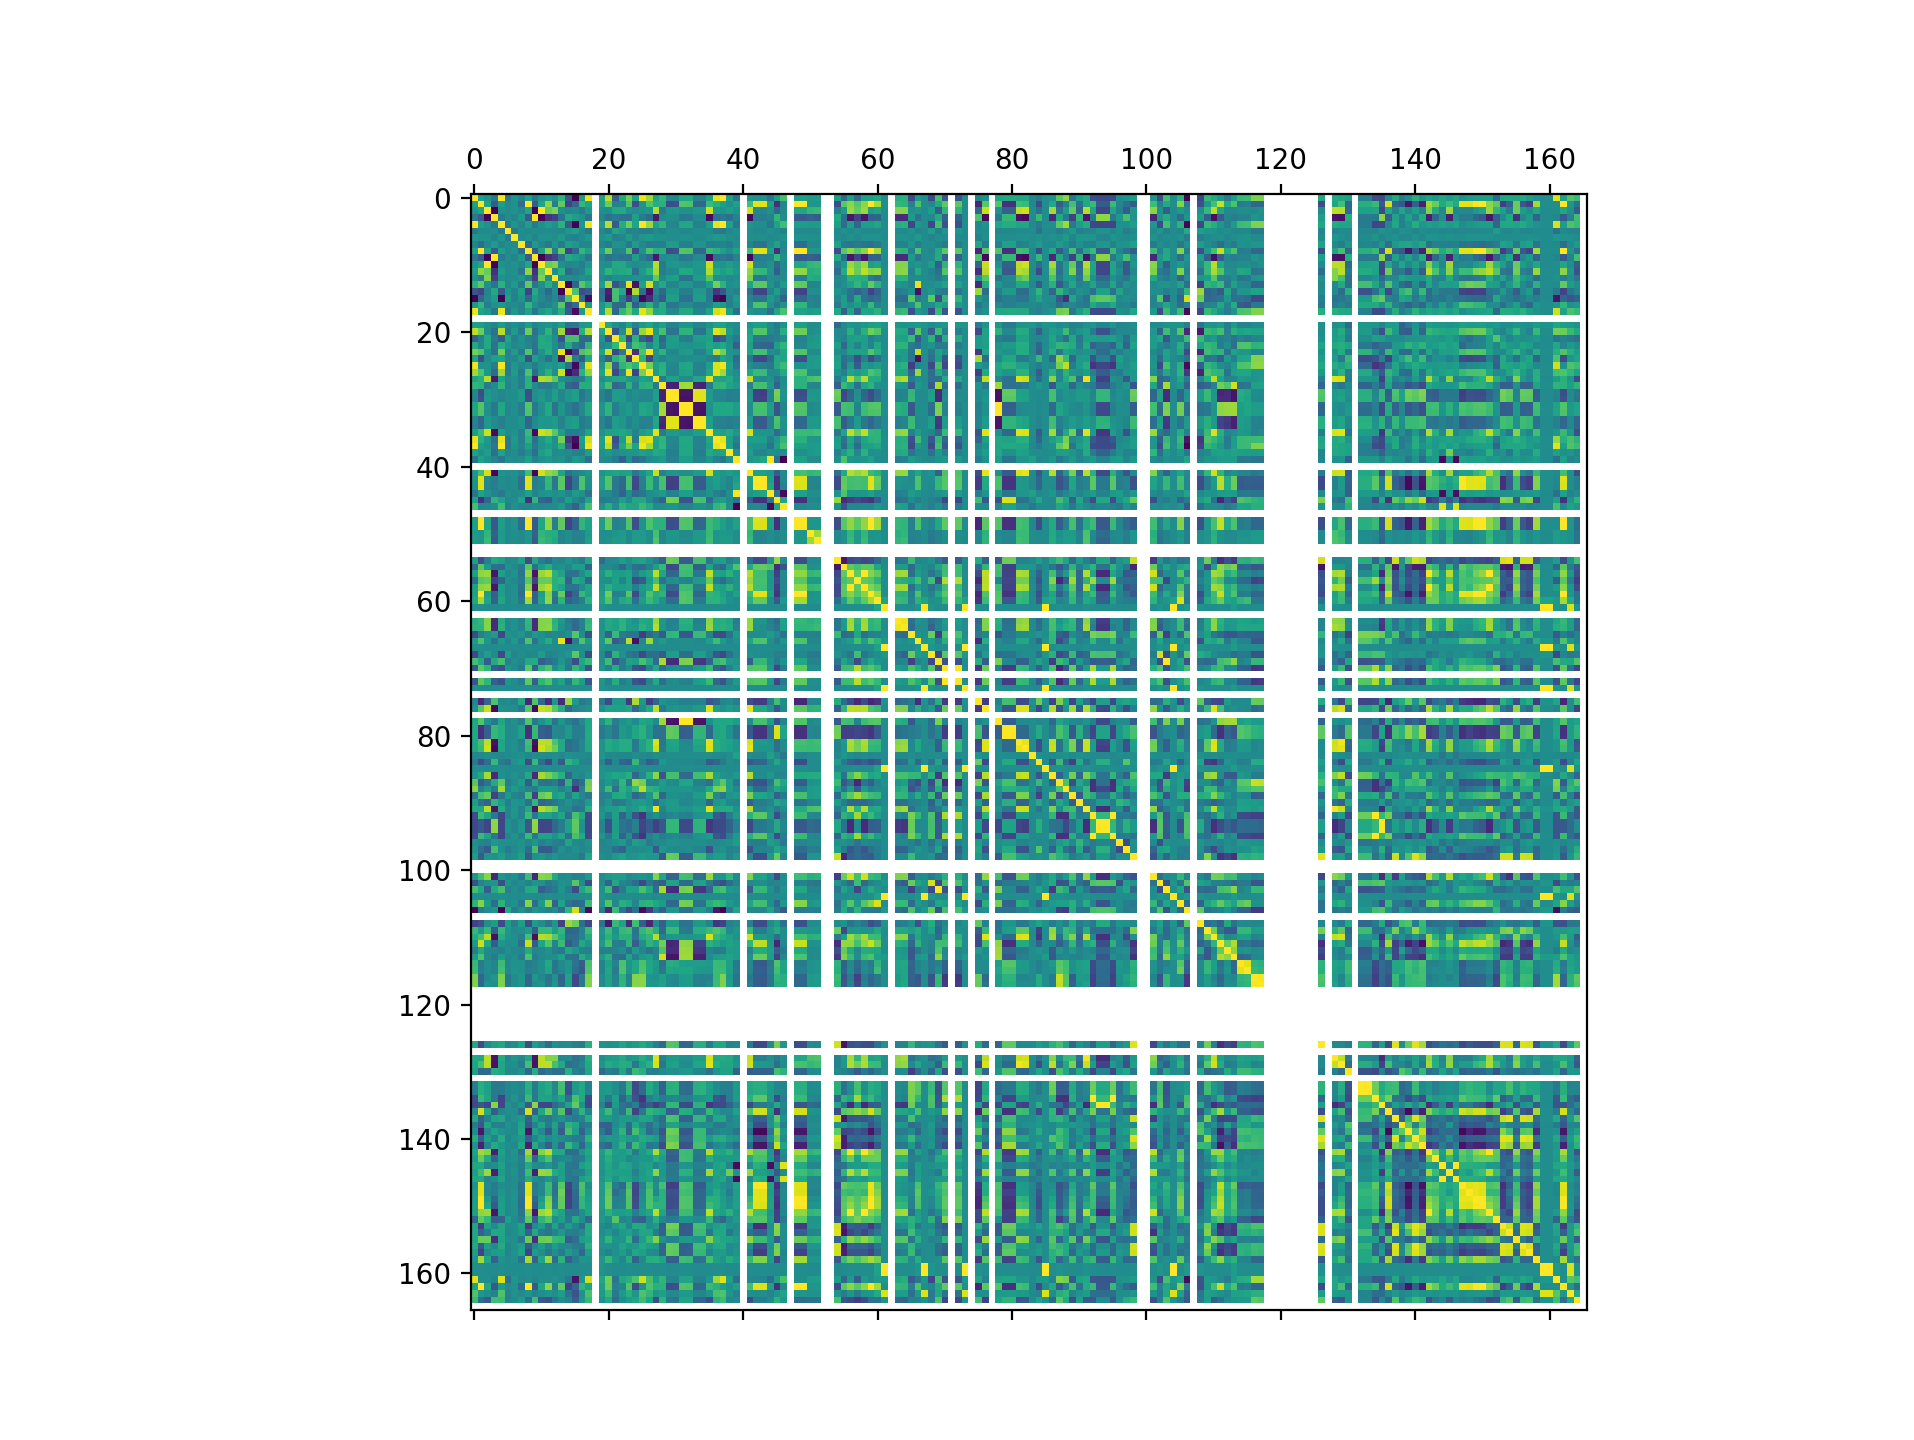

In [100]:
plt.matshow(corr_mat)